**Use of Optical Flow Algorithm to Analyse the Movement of Cancer Cells in Scratch Wound Assay

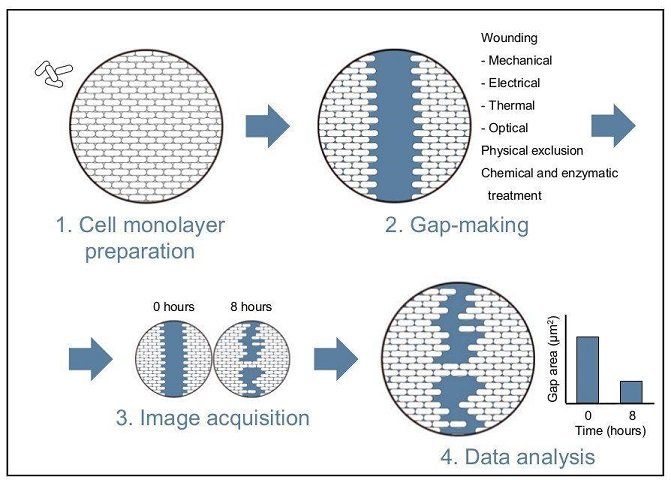

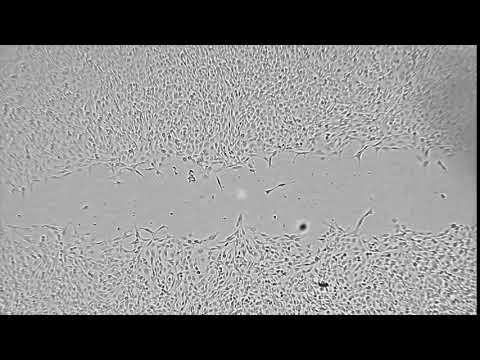

In [15]:
from IPython.display import YouTubeVideo
YouTubeVideo("ylNm1FVk9bI", width=600)

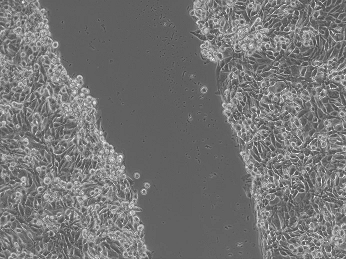

In [2]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.util import img_as_ubyte

In [3]:
def normalize(x):
  return (x - x.min()) / (x.max() - x.min())

n=2 MDA-MB-231 DMSO 21h.tif
9: 0
9: 1
9: 2
9: 3
9: 4
9: 5
9: 6
9: 7
9: 8


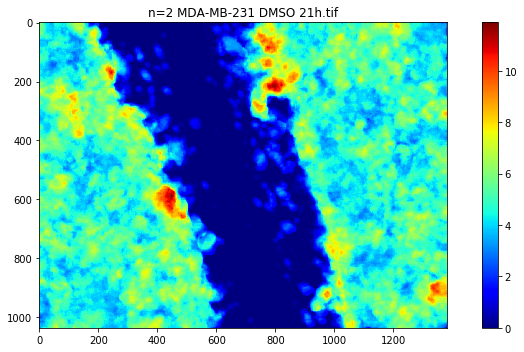

In [16]:
# last frame
fr = 10

if __name__ == '__main__':

  # parameters
  dir_in_name = r"C:\Users\sulei\Documents\scratch_wound\in"
  dir_out_name = r"C:\Users\sulei\Documents\scratch_wound\out"

  # variables
  names = []
  ims = []
  imms = []

  # list files
  im_files = [f for f in os.listdir(dir_in_name) if f.endswith('.tif')]

  # read image
  for i in im_files:
    im = io.imread(os.path.join(dir_in_name, i))
    im = np.moveaxis(im, 0, -1)  # [z,x,y] -> [x,y,z]

    im = im[:,:,0:fr]  
    ims.append(im)
    names.append(i)

  for i in range(0, len(ims)):
    #i=1
    print(names[i])
    # normalize
    im = normalize(ims[i])
    im = img_as_ubyte(im)
    # compute the optical flow
    immt = np.zeros_like(im, shape=[im.shape[0],im.shape[1],im.shape[2]-1])
    for j in range(im.shape[2]-1):
        print(str(im.shape[2]-1) + ': ' + str(j))
        flow = cv.calcOpticalFlowFarneback(im[:,:,j], im[:,:,j+1], None, 0.5, 3, 15, 3, 5, 1.2, 0)
        # flow,pyr_scale,levels,iterations,winsize,poly_n,poly_sigma,flags=0
        imm, ima = cv.cartToPolar(flow[..., 0], flow[..., 1])
        immt[:,:,j] = imm
    # mean magnitude
    imm = np.mean(immt, axis=2)
    imms.append(imm)

# find motion range
imm = np.asarray(imms)
r1 = imm.min()
r2 = imm.max()

for i in range(0, len(imms)):
    plt.figure(i+1)
    plt.imshow(imms[i], cmap='jet', vmin=r1, vmax=r2)
    plt.title(names[i])
    plt.colorbar()
    plt.savefig(os.path.join(dir_out_name, names[i].replace('.tif','_mot_cv_q'+str(fr)+'.png')),bbox_inches='tight')
plt.show()

In [17]:
from numpy import arccos, array
from numpy.linalg import norm
import math

In [18]:
def theta(v,w):
  #return arccos(v.dot(w)/(norm(v)*norm(w)))
  return(np.math.atan2(np.linalg.det([v,w]),np.dot(v,w)))

n=2 MDA-MB-231 DMSO 21h.tif
19: 0
19: 1
19: 2
19: 3
19: 4
19: 5
19: 6
19: 7
19: 8
19: 9
19: 10
19: 11
19: 12
19: 13
19: 14
19: 15
19: 16
19: 17
19: 18


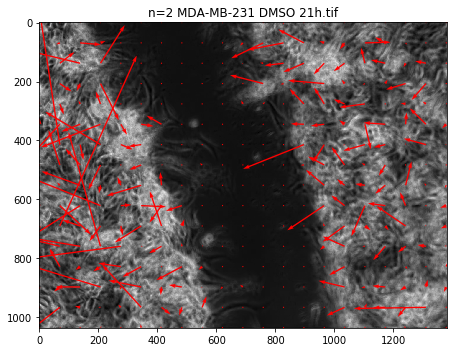

C:\Users\sulei\Anaconda3\lib\site-packages\ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


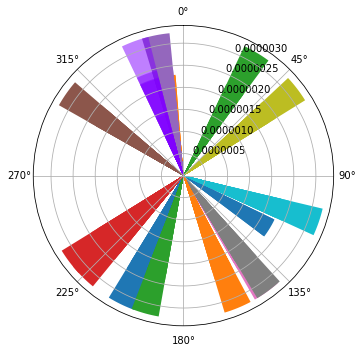

In [19]:
fr = 20

if __name__ == '__main__':

  # parameters
  dir_in_name = r"C:\Users\sulei\Documents\scratch_wound\in"
  dir_out_name = r"C:\Users\sulei\Documents\scratch_wound\out"

  # variables
  names = []
  ims = []
  imfxs = []
  imfys = []

  # list files
  im_files = [f for f in os.listdir(dir_in_name) if f.endswith('.tif')]

  # read image
  for i in im_files:
    im = io.imread(os.path.join(dir_in_name, i))
    im = np.moveaxis(im, 0, -1)  # [z,x,y] -> [x,y,z]

    im = im[:,:,0:fr]
    ims.append(im)
    names.append(i)

  for i in range(0, len(ims)):
    #i = 0
    print(names[i])
    # normalize
    im = normalize(ims[i])
    # compute the optical flow
    imfxt = np.zeros_like(im, shape=[im.shape[0],im.shape[1],im.shape[2]-1])
    imfyt = np.zeros_like(im, shape=[im.shape[0],im.shape[1],im.shape[2]-1])
    for j in range(im.shape[2]-1):
      print(str(im.shape[2]-1) + ': ' + str(j))
      flow = cv.calcOpticalFlowFarneback(im[:,:,j], im[:,:,j+1], None, 0.5, 3, 15, 3, 5, 1.2, 0)
      # flow,pyr_scale,levels,iterations,winsize,poly_n,poly_sigma,flags=0
      imfxt[:,:,j] = flow[:, :, 0]
      imfyt[:,:,j] = flow[:, :, 1]

    # mean magnitude
    imfxm = np.mean(imfxt, axis=2)
    imfym = np.mean(imfyt, axis=2)
    imfxs.append(imfxm)
    imfys.append(imfym)

  # plot
  nvec = 20  # number of vectors to be displayed along each image dimension
  nl, nc = imfxm.shape
  step = max(nl//nvec, nc//nvec)
  y, x = np.mgrid[:nl:step, :nc:step]
  for i in range(0, len(imfxs)):
    imfxm = imfxs[i]
    imfym = imfys[i]
    u_ = imfxm[::step, ::step]
    v_ = imfym[::step, ::step]
    plt.figure(i+1)
    plt.imshow(np.mean(im, axis=2),cmap='gray' )
    plt.title(names[i])
    plt.quiver(x, y, u_, v_, color='r')

    plt.savefig(os.path.join(dir_out_name, names[i].replace('.tif','_orien_cv_q.png')))
  plt.show()
  #print(len(u_))
  #print(v_)
  radii = []
  for i in range(1, len(u_)):
    for j in range (1, len(v_)):
      #array for measuring angle
      arr = np.asarray([v_[j][i], u_[j][i]])
      # remove rows having all zeroes
      data = arr[~np.all(arr == 0, axis=0)]
      #print(data)
      # base vector [1,0]
      base = array([1,0])
      # angle between vectors
      angle = theta(base, arr)
      #print(angle)
      # Get the magnitude of the vector
      radi = np.linalg.norm(arr)
      #radi = np.sqrt(arr.dot(arr))
      radii.append(radi)
      #print('r:', radii)
    plt.rcParams["figure.figsize"] = [10.00, 5.00]
    plt.rcParams["figure.autolayout"] = True

    width = np.pi / 16
    ax = plt.subplot(111, projection='polar')
    bars = ax.bar(angle, radii, width=width, bottom=0.0)
  for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.rainbow(r / 10.0))
    bar.set_alpha(0.5)
    # set 0 on North of polar axis
    ax.set_theta_zero_location("N")
    # set angles anti-clockwise
    ax.set_theta_direction(-1)
    #plt.savefig(str(names[i])+"_circular_histogram_.png",bbox_inches='tight')
  plt.show()

In [8]:
# function to compute magnitude of a vector
def magnitude(vector):
    return math.sqrt(sum(pow(element, 2) for element in vector))

# function to normalize angle 0 to 360 for negatives between -pi and pi
def normalize_angle_positive(angle):
    #if angle < 0:
        #return + math.ceil( -angle / 360 ) * 360
    return angle % 360

n=2 MDA-MB-231 DMSO 21h.tif
19: 0
19: 1
19: 2
19: 3
19: 4
19: 5
19: 6
19: 7
19: 8
19: 9
19: 10
19: 11
19: 12
19: 13
19: 14
19: 15
19: 16
19: 17
19: 18


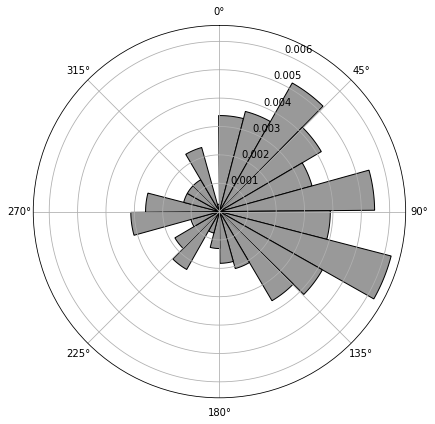

In [21]:
fr = 20

if __name__ == '__main__':

    # parameters
    # parameters
    dir_in_name = r"C:\Users\sulei\Documents\scratch_wound\in"
    dir_out_name = r"C:\Users\sulei\Documents\scratch_wound\out"


    # list files
    im_files = [f for f in sorted(os.listdir(dir_in_name)) if f.endswith('.tif')]
    
    # variables
    names = []
    ims = []
    imfxs = []
    imfys = []

  # read image
    for i in im_files:
      im = io.imread(os.path.join(dir_in_name, i))
      im = np.moveaxis(im, 0, -1)  # [z,x,y] -> [x,y,z]
      # im = im[:,0:400,0:47]
      im = im[:, :, 0:fr]  # 20, 40, 60, 80
      ims.append(im)
      names.append(i)

    for i in range(0, len(ims)):
        #i = 0
        print(names[i])
        # normalize
        im = normalize(ims[i])
        # compute the optical flow
        imfxt = np.zeros_like(im, shape=[im.shape[0],im.shape[1],im.shape[2]-1])
        imfyt = np.zeros_like(im, shape=[im.shape[0],im.shape[1],im.shape[2]-1])
        for j in range(im.shape[2]-1):
            print(str(im.shape[2]-1) + ': ' + str(j))
            flow = cv.calcOpticalFlowFarneback(im[:,:,j], im[:,:,j+1], None, 0.5, 3, 15, 3, 5, 1.2, 0)
            # flow,pyr_scale,levels,iterations,winsize,poly_n,poly_sigma,flags=0
            imfxt[:,:,j] = flow[:, :, 0]
            imfyt[:,:,j] = flow[:, :, 1]

            # mean magnitude
            imfxm = np.mean(imfxt, axis=2)
            imfym = np.mean(imfyt, axis=2)
            imfxs.append(imfxm)
            imfys.append(imfym)

            # plot
            nvec = 20  # number of vectors to be displayed along each image dimension
            nl, nc = imfxm.shape
            step = max(nl//nvec, nc//nvec)
            y, x = np.mgrid[:nl:step, :nc:step]
            for i in range(0, len(imfxs)):
                imfxm = imfxs[i]
                imfym = imfys[i]
                u_ = imfxm[::step, ::step]
                v_ = imfym[::step, ::step]
                #plt.figure(i+1)
                #plt.imshow(np.mean(im, axis=2), cmap='gray')
                #plt.title(names[i])
                #plt.quiver(x, y, u_, v_, color='r')
                # plt.quiver(x, y, u_, v_, color='r', units='dots', 
                #        angles='xy', scale_units='xy', lw=2, width=2)
                #plt.savefig(os.path.join(dir_out_name, names[i].replace('.tif','_orien_1_q'+str(fr)+'.png')),
                 #               bbox_inches='tight')
                #plt.savefig(os.path.join(dir_out_name, names[i].replace('.tif','_orien_1_q'+str(fr)+'.png')))
            #plt.show()

        angles = []
        vc = np.zeros(2)
        for k in range(0, len(u_)):
            for l in range (0, len(v_)):
                # array for measuring angle
                arr = np.asarray([u_[l][k], v_[l][k]])
                v = np.array([u_[l][k], v_[l][k]])                    
                v = v/np.linalg.norm(v)
                if np.isnan(v[0]):
                    v = np.zeros(2)
                #print(v)
                vc = vc + v                    
                #compute magnitude of vector and remove zeros
                if magnitude(arr) != 0:
                    # using base vector o [0,-1]
                    bases = array([0,1])
                    # angle between vectors
                    # convert angles from radians to degrees
                    angle = np.degrees(theta(bases, arr))
                    # angle = np.degrees(theta(bases, arr))
                    # normalize angles from -pi and pi to 0 and 360
                    angle = normalize_angle_positive(angle)
                    angles.append(angle)
            # print("Angle values :", angles)
        # print(vc)
        #print(np.degrees(theta(bases[i], vc)))  
        # exit(0)
        bin_size = 15
        # histogram normalized
        a, b = np.histogram(angles, bins=np.arange(0, 360+bin_size, bin_size), 
                            density=True)
        # number of occurrence of the angles in each bin
        centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])
        # plot polar histogram
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='polar')
        ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0,
                align='center', color='.6', edgecolor='k')
        # set 0 on North of polar axis
        ax.set_theta_zero_location("N")
        # set angles anti-clockwise
        ax.set_theta_direction(-1)
        #min_ylim = 0
        #max_ylim = 0.016
        #ax.set_ylim(min_ylim, max_ylim)
        #plt.title(names[i].replace('.tif', ''))
        # plt.savefig(str(names[i])+"_polar_hist.png", bbox_inches='tight')
        #plt.savefig(os.path.join(dir_out_name, names[i].replace('.tif','_polar_hist_'+str(fr)+'.png')),bbox_inches='tight')
        plt.show()

n=2 MDA-MB-231 DMSO 21h.tif
19: 0
19: 1
19: 2
19: 3
19: 4
19: 5
19: 6
19: 7
19: 8
19: 9
19: 10
19: 11
19: 12
19: 13
19: 14
19: 15
19: 16
19: 17
19: 18


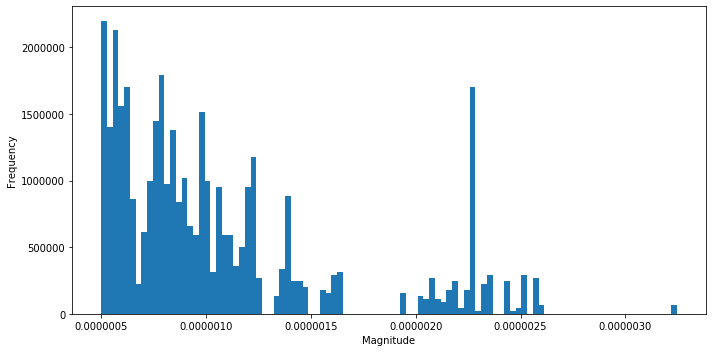

In [26]:
fr = 20

if __name__ == '__main__':

    # parameters
    # parameters
    dir_in_name = r"C:\Users\sulei\Documents\scratch_wound\in"
    dir_out_name = r"C:\Users\sulei\Documents\scratch_wound\out"


    # list files
    im_files = [f for f in sorted(os.listdir(dir_in_name)) if f.endswith('.tif')]
    
    # variables
    names = []
    ims = []
    imfxs = []
    imfys = []
    mags = []

  # read image
    for i in im_files:
      im = io.imread(os.path.join(dir_in_name, i))
      im = np.moveaxis(im, 0, -1)  # [z,x,y] -> [x,y,z]
      # im = im[:,0:400,0:47]
      im = im[:, :, 0:fr]  # 20, 40, 60, 80
      ims.append(im)
      names.append(i)

    for i in range(0, len(ims)):
        #i = 0
        print(names[i])
        # normalize
        im = normalize(ims[i])
        # compute the optical flow
        imfxt = np.zeros_like(im, shape=[im.shape[0],im.shape[1],im.shape[2]-1])
        imfyt = np.zeros_like(im, shape=[im.shape[0],im.shape[1],im.shape[2]-1])
        for j in range(im.shape[2]-1):
            print(str(im.shape[2]-1) + ': ' + str(j))
            flow = cv.calcOpticalFlowFarneback(im[:,:,j], im[:,:,j+1], None, 0.5, 3, 15, 3, 5, 1.2, 0)
            # flow,pyr_scale,levels,iterations,winsize,poly_n,poly_sigma,flags=0
            imfxt[:,:,j] = flow[:, :, 0]
            imfyt[:,:,j] = flow[:, :, 1]

            # mean magnitude
            imfxm = np.mean(imfxt, axis=2)
            imfym = np.mean(imfyt, axis=2)
            imfxs.append(imfxm)
            imfys.append(imfym)

            # plot
            nvec = 20  # number of vectors to be displayed along each image dimension
            nl, nc = imfxm.shape
            step = max(nl//nvec, nc//nvec)
            y, x = np.mgrid[:nl:step, :nc:step]
            for i in range(0, len(imfxs)):
                imfxm = imfxs[i]
                imfym = imfys[i]
                u_ = imfxm[::step, ::step]
                v_ = imfym[::step, ::step]

                mag = np.zeros(len(u_))
                for k in range(0, len(u_)):
                    for l in range (0, len(v_)):
                    #array for measuring angle
                        arr = np.asarray([u_[l][k], v_[l][k]])
                    #compute magnitude of vector and remove zeros
                        if magnitude(arr) != 0:
                             if magnitude(arr) >0.0000005:
                                mag = (magnitude(arr))
                            #print(angle)
                            # normalize angles from -pi and pi to 0 and 360
                            #mag = normalize_angle_positive(angle)
                            #print(ang)
                                mags.append(mag)
                    #print("Angle values :", mags)

        bin_size = 100
        #mags = nrmlz(mags)
        # histogram normalized
        plt.ylabel('Frequency')
        plt.xlabel('Magnitude')
        #plt.title(names[i].replace('.tif', ''))
        #plt.ylim([0, 0.35])
        #plt.xlim([0, 1])
        plt.hist(mags, bins=bin_size, density=True)
        plt.show()